
Neste trabalho, vamos tentar representar outro jogo  de tabuleiro com o conhecimento que temos da linguagem Python. Este notebook oferecerá a você uma maneira de utilizar as estruturas de dados que já vêm por padrão na linguagem Python para representar o tabuleiro, as jogadas válidas e criar um jogador que faz jogadas ao acaso. A forma de representação criada neste notebook pode (e deve) ser modificada por você se concluir que outras formas são mais eficientes. Você pode optar, por exemplo, em usar algo mais próximo do que o que foi feito em sala de aula (representação do tabuleiro como tuplas de números inteiros) para o jogo da velha.


# Breakthrough

Breakthrough é um jogo de estratégia que possui algumas similaridades com xadrez e damas. O jogo precisa de dois jogadores (peças brancas e pretas), e um tabuleiro semelhante ao dos jogos de xadrez e damas.

Nesse tabuleiro, o número de linhas e colunas poderá variar. Para identificar uma posição no tabuleiro usaremos o padrão (linha,coluna). A posição (1,1) será sempre a que está no canto inferior esquerdo das brancas e as outras posições serão numeradas a partir dela.

## Movimentação e Captura

O breakthrough possui apenas um tipo de peça que pode se mover um quadrado para frente ou para a diagonal, mas sempre em direção ao campo adversário. Em outras palavras, uma peça jamais pode retroceder ou se movimentar para outra posição na mesma linha. Isso ajuda a  garantir que o jogo não será infinito.

Uma peça pode mover-se para uma posição ocupada pelo adversário se, e somente se, a posição do adversário está diagonalmente a um quadrado de distância. Neste caso, a peça do oponente será removida do tabuleiro (capturada) e o  jogador ocupará a casa com a sua peça. A figura a seguir ilustra os dois conceitos.


![alt text](http://www.ic.unicamp.br/~udias/si202/movcapt.png)

Na figura acima, a peça que está em (4,2) pode mover para as casas (5,1), (5,2) e (5,3), que estão marcadas com um "x". A peça que está em (4,6) pode capturar as peças pretas que estão em (5,5) e (5,7).

Vale ressaltar que a captura não é obrigatória e não pode ser efetuada em cadeia (como no jogo de damas).

## Fim de Jogo

O jogo acaba quando um dos jogadores consegue colocar uma peça na sua última linha. Ou seja, o objetivo das brancas é colocar uma peça na linha $n$, onde $n$ é o número de linhas, e o objetivo das pretas é colocar uma peça na linha 1.

Quando um dos jogadores não possuir mais nenhuma peça no tabuleiro, será considerado perdedor, pois não poderá mais atingir o objetivo do jogo e não conseguirá evitar que o adversário o atinja.

Um ponto que deve ser observado é que **o jogo nunca terminará empatado**, pois uma peça nunca pode retroceder e é sempre possível encontrar pelo menos uma diagonal para onde possa se movimentar ou capturar.





### Jogadores

O breaktrough, assim como todos os jogos que usaremos nesta disciplina, vão ser jogados por dois jogadores. Seguiremos um padrão para nomear os jogadores:

**O jogador que inicia a partida será chamado de "1", o outro jogador será chamado de "-1"**

Como no breaktrough as peças **brancas** começam, então o jogador que conduz as peças brancas será o jogador **1**, enquanto que o jogador que conduz as peças pretas será chamado de **-1**.

Lembre-se que todos os jogos desta disciplina são em turnos, então esse padrão poderá ser seguido por você em seu trabalho, a não ser que uma razão muito boa o faça mudar de ideia.

## Biblioteca de suporte

Uma biblioteca foi criada especificamente para este jogo e está disponível para você no github. No trabalho, você deve importar esta biblioteca e entender o que ela faz.

In [6]:
import wget

wget.download('https://raw.githubusercontent.com/ulissesdias/tt003/main/libraries/breakthrough.py')


'breakthrough.py'

In [7]:
import breakthrough as bkt

# Representação Visual do Tabuleiro

Vamos fazer a representação visual do tabuleiro, você notará que não difere muito do que aprendemos para o jogo da velha.

Foram implementadas uma série de funções que você pode fazer uso. Uma dessas funções é a **draw_board(lines, columns, white_positions, black_positions)**, que recebe as configurações de um tabuleiro e imprime esse tabuleiro no kernel. Os parâmetros para essa função são explicados abaixo.

**lines:** número de linhas no tabuleiro.

**columns:** número de colunas no tabuleiro.

**white_positions:** posição das peças brancas.

**black_positions:** posição das peças pretas.

Um exemplo da chamada da função será mostrado a seguir.

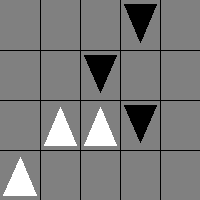

In [3]:
board = bkt.draw_board(4,5,((1,1),(2,2),(2,3)), ((3,3),(4,4),(2,4)))
display(board)

## Sequência de Jogadas

Será muito mais fácil para nós entendermos o jogo se tivermos uma maneira de visualizar uma partida inteira. Para isso, vamos usar a função **display_sequence**


In [4]:
images = [
    bkt.draw_board(4,5,((1,1),(2,2),(2,3)), ((3,3),(4,4),(2,4))),
    bkt.draw_board(4,5,((2,1),(2,2),(2,3)), ((3,3),(4,4),(2,4))),
    bkt.draw_board(4,5,((2,1),(2,3)), ((2,2),(4,4),(2,4))),
    bkt.draw_board(4,5,((3,1),(2,3)), ((2,2),(4,4),(2,4))),
    bkt.draw_board(4,5,((3,1),(2,3)), ((2,2),(3,4),(2,4))),
    bkt.draw_board(4,5,((4,1),(2,3)), ((2,2),(3,4),(2,4))),
]
bkt.display_sequence(images)

interactive(children=(IntSlider(value=2, description='frame', max=5), Output()), _dom_classes=('widget-interac…

<function breakthrough.display_sequence.<locals>._show(frame=(0, 5))>

# Implementando o Jogo

Vamos começar a implementar o jogo propriamente dito para que seja possível posteriormente criar um jogador com aprendizado por reforço. Em sala de aula, aprendemos que para isso precisamos de dois itens principais:

1. Identificar quando um jogo acabou e representar as condições de vitória.
2. Identificar as jogadas válidas para cada estado (ações possíveis).


In [5]:
## Brancas vencem a partida
bkt.winner(4,5,((4,1),(2,3)), ((2,2),(3,4),(2,4)))

1

In [6]:
## Partida não acabou
bkt.winner(4,5,((2,1),(2,3)), ((2,2),(4,4),(2,4)))

0

## Jogadas Válidas para cada estado

A biblioteca implementa também a função **get_valid_moves**. Nesse caso, você deverá passar as configurações do tabuleiro (**linhas**, **colunas**, **posições das brancas**, e **posições das pretas**), além de quem tem a vez de jogar. A função devolverá a posição inicial e a final das peças que podem ser movidas. Vamos supor o seguinte tabuleiro e ver quais jogadas poderiam ser feitas pelas brancas e pretas:

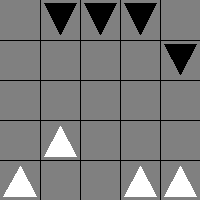

In [18]:
## Tabuleiro
lines = 5
columns = 5
white_positions = ((1,1),(2,2),(1,4),(1,5))
black_positions = ((5,2),(5,3), (5,4),(4,5))
bkt.draw_board(lines, columns, white_positions, black_positions)

In [8]:
## Jogadas das brancas
bkt.get_valid_moves(lines, columns, white_positions, black_positions, 1)

(((1, 1), (2, 1)),
 ((2, 2), (3, 1)),
 ((2, 2), (3, 2)),
 ((2, 2), (3, 3)),
 ((1, 4), (2, 3)),
 ((1, 4), (2, 4)),
 ((1, 4), (2, 5)),
 ((1, 5), (2, 4)),
 ((1, 5), (2, 5)))

In [9]:
## Jogadas das pretas
bkt.get_valid_moves(lines, columns, white_positions, black_positions, -1)

[[(5, 2), (4, 3)],
 [(5, 2), (4, 2)],
 [(5, 2), (4, 1)],
 [(5, 3), (4, 4)],
 [(5, 3), (4, 3)],
 [(5, 3), (4, 2)],
 [(5, 4), (4, 4)],
 [(5, 4), (4, 3)],
 [(4, 5), (3, 5)],
 [(4, 5), (3, 4)]]

## Efetuando Jogadas

Supondo que queremos criar um **bot** para jogar breaktrough, o que ele precisa saber? Obviamente ele precisa saber quais são as jogadas válidas e qual peças ele está conduzindo. Basta isso para criarmos um jogador sem nenhum tipo de inteligência, que escolha ao acaso uma jogada dentre todas as disponíveis.


In [9]:
## O jogador retornará a peça que irá mover no
## tabuleiro, seguida da posição no tabuleiro onde
## deverá colocar a peça.
player = bkt.random_player

In [11]:
## Retorna uma jogada se for a vez das brancas
player(lines, columns, white_positions, black_positions, 1)

((1, 5), (2, 4))

In [12]:
## Retorna uma jogada se for a vez das pretas
player(lines, columns, white_positions, black_positions, -1)

[(5, 2), (4, 1)]

## Gerenciador de Jogo

Temos um tabuleiro e um jogador que pode conduzir as peças (brancas e pretas). O que devemos fazer agora é criar um gerenciador de jogo para que uma partida possa ser iniciada. O gerenciador irá:

1.   Garantir que pedirá para o jogador certo jogar (alternância entre jogadores).
2.   Gerenciar o tabuleiro de modo a fazer com que as jogadas sejam concretizadas.
3.   Verificar se as condições de vitória, derrota ou empates já foram satisfeitas.
4.   Armazenar um histórico de jogadas, para que os jogadores posteriormente possam analisar.

A função que faz tudo isso é a função game da nossa biblioteca. Essa função devolverá o vencedor e um histórico das jogadas. Note que o histórico das jogadas é devolvido como uma sequência da seguinte forma:

[ (turn_0, white_positions_0, black_positions_0), (turn_1, white_positions_1, black_positions_1), ..., (turn_n, white_positions_n, black_positions_n) ]

In [14]:
## Agora vamos colocar o jogador para jogar contra si mesmo.
winner, history = bkt.game(player, player)

In [15]:
## Veja quem é o vencedor
winner

1

In [16]:
## Veja o histórico de partidas.
history

[(1,
  ((1, 1), (1, 2), (1, 3), (1, 4), (1, 5)),
  ((5, 1), (5, 2), (5, 3), (5, 4), (5, 5))),
 (-1,
  ((1, 1), (1, 3), (1, 4), (1, 5), (2, 1)),
  ((5, 1), (5, 2), (5, 3), (5, 4), (5, 5))),
 (1,
  ((1, 1), (1, 3), (1, 4), (1, 5), (2, 1)),
  ((5, 1), (5, 2), (5, 3), (5, 4), (4, 5))),
 (-1,
  ((1, 1), (1, 3), (1, 5), (2, 1), (2, 3)),
  ((5, 1), (5, 2), (5, 3), (5, 4), (4, 5))),
 (1,
  ((1, 1), (1, 3), (1, 5), (2, 1), (2, 3)),
  ((5, 1), (5, 3), (5, 4), (4, 5), (4, 1))),
 (-1,
  ((1, 1), (1, 3), (1, 5), (2, 1), (3, 2)),
  ((5, 1), (5, 3), (5, 4), (4, 5), (4, 1))),
 (1,
  ((1, 1), (1, 3), (1, 5), (2, 1), (3, 2)),
  ((5, 1), (5, 3), (5, 4), (4, 1), (3, 4))),
 (-1,
  ((1, 1), (1, 5), (2, 1), (3, 2), (2, 3)),
  ((5, 1), (5, 3), (5, 4), (4, 1), (3, 4))),
 (1,
  ((1, 1), (1, 5), (2, 1), (3, 2), (2, 3)),
  ((5, 1), (5, 3), (5, 4), (4, 1), (2, 5))),
 (-1,
  ((1, 1), (1, 5), (2, 1), (3, 2), (3, 3)),
  ((5, 1), (5, 3), (5, 4), (4, 1), (2, 5))),
 (1,
  ((1, 1), (1, 5), (2, 1), (3, 2), (3, 3)),
  ((5,

## Desenhando Histórico

Criamos anteriormente uma função que mostra uma sequência de **Images** na tela. Agora precisamos de uma função que cria esses objetos **Image**. A função que faz isso deverá percorrer o histórico e fazer as chamadas a **draw_board** de maneira adequada, nada muito complicado comparado com o que já conseguimos evoluir.

In [ ]:
images = bkt.generate_image_history(lines, columns, history)
bkt.display_sequence(images)

## Jogando contra humanos

Você pode pegar um jogador qualquer e fazê-lo jogar contra um humano

In [18]:
# winner, history = bkt.game(player, bkt.human_player)

## Criando um novo Jogador

O seu trabalho agora será criar um jogador inteligente para este jogo de tabuleiro com o conhecimento que vimos em sala de aula. O seu jogador pode usar qualquer variável global (como o state_values) que vimos em sala de aula.

As únicas restrições do seu jogador é que:

1. Ele deverá receber todos os parâmetros que representam um tabuleiro: **linhas**, **colunas**, **posição das brancas** e **posição das pretas**.
2. Ele deverá receber de quem é a vez de jogar.
3. Ele deverá receber um **epsilon**.

Nesse caso, a assinatura do seu jogador deve ser:

```
def novo_player(lines, columns, white_positions, black_positions, turn, epsilon)
```

Por exemplo, o jogador a seguir tem a assinatura correta.

In [19]:
def novo_player(lines, columns, white_positions, black_positions, turn, epsilon) :
    valid_moves = bkt.get_valid_moves(lines, columns, white_positions, black_positions, turn)
    print(epsilon)
    if epsilon < 0.5 :
        return valid_moves[0]
    else :
        return valid_moves[-1]

Note que se você quiser passar para o seu player um **epsilon** na chamada da função **game**, você deverá passar o epsilon para o próprio **game**.

In [20]:
bkt.game(novo_player, novo_player, lines, columns, white_positions, black_positions, epsilon = 0.7)

0.7
0.7
0.7
0.7
0.7
0.7


(-1,
 [(1, ((1, 1), (2, 2), (1, 4), (1, 5)), ((5, 2), (5, 3), (5, 4), (4, 5))),
  (-1, ((1, 1), (2, 2), (1, 4), (2, 5)), ((5, 2), (5, 3), (5, 4), (4, 5))),
  (1, ((1, 1), (2, 2), (1, 4), (2, 5)), ((5, 2), (5, 3), (5, 4), (3, 4))),
  (-1, ((1, 1), (2, 2), (1, 4), (3, 5)), ((5, 2), (5, 3), (5, 4), (3, 4))),
  (1, ((1, 1), (2, 2), (1, 4), (3, 5)), ((5, 2), (5, 3), (5, 4), (2, 3))),
  (-1, ((1, 1), (2, 2), (1, 4), (4, 5)), ((5, 2), (5, 3), (5, 4), (2, 3))),
  (1, ((1, 1), (2, 2), (1, 4), (4, 5)), ((5, 2), (5, 3), (5, 4), (1, 2)))])

# Crie um Jogador Inteligente com Monte Carlo

Agora é sua vez, crie um jogador inteligente usando a abordagem de Monte Carlo. Nós configuraremos o ambiente da seguinte forma:

1. Número de Linhas: 4
2. Número de Colunas: 4
3. Peças brancas: 4 peças iniciadas na linha 1
4. Peças pretas: 4 peças iniciadas na linha 4.

Em outras palavras, o tabuleiro será:

In [ ]:
import breakthrough as bkt

## Tabuleiro
lines = 4
columns = 4
white_positions = ((1,1),(1,2),(1,3),(1,4))
black_positions = ((4,1),(4,2), (4,3),(4,4))
bkt.draw_board(lines, columns, white_positions, black_positions)
player = bkt.random_player

######
def campeonato(player1, player2, num_games = 1000) :
    results = [0,0,0]
    for i in range(num_games) :
        result, x = bkt.game(player1, player2)
        results[result] += 1
    return tuple(results)
######

def rewards(lines, columns, white_positions, black_positions) :
    lwinner = bkt.winner(lines, columns, white_positions, black_positions)
    if lwinner == 0 :
        return -1
    elif lwinner == 1 :
        return 100
    else :
        return -100



#######
import random

## Para computação dos state_values, usaremos gamma = 0.7 para
## descontos futuros
gamma = 0.7

## Os state_values serão uma variável global neste notebook. Nele
## estará contido tudo aquilo que o agente precisa para fazer uma boa
## jogada
state_values = {}


def player_rl(lines, columns, white_positions, black_positions, turn, epsilon = 0): 
    valid_moves = bkt.get_valid_moves(lines, columns, white_positions, black_positions, turn)
    
    epsilon_random = random.random()
    if epsilon_random < epsilon :
        return random.choice(valid_moves)
    else :
        scores = []
        for move in valid_moves :
            next_state = list(black_positions)
            if turn == 1:
                next_state = list(white_positions)
            next_state[next_state.index(move[0])] = move[1]
            val = (tuple(white_positions), tuple(next_state))
            if turn == 1:
                val = (tuple(next_state), tuple(black_positions))
            scores.append(rewards(tuple(next_state), columns, *val) + gamma*state_values.get(val, 0))
        
        best_score = None
        if (turn == 1) :
            best_score = max(scores)
        else :
            best_score = min(scores)
          
        best_moves = []
        for i in range(len(scores)) :
            if scores[i] == best_score :
                best_moves.append(valid_moves[i])
        
        # if len(best_moves) == 1 :
        #     print((best_score, scores, best_moves))
        
        return tuple(random.choice(best_moves))
#########

## O código a seguir atualiza os state_values. Note que esses state_values
## são uma variável global.

def update_state_values_monte_carlo(rewards, amostra, columns, gamma = 0.7, alpha = 0.1) :
    ## Definiremos o último state_value como zero para iniciar o processo iterativo.
    discounted_return = 0
    next_state        = amostra[-1]

    ## Observe o uso de "reversed" estamos iterando de trás pra frente.
    for state in reversed(amostra[:-1]) :
        ## Abaixo simplesmente computamos o retorno a longo prazo e somamos com a recompensa imediata
        reward = rewards(lines, columns, next_state[1], next_state[-1])
        discounted_return = gamma*discounted_return + reward
        ## Abaixo a fórmula para atualização dos state-values. Isso substitui o valor esperado (média).
        ## Note que estamos inicializando os state_values com zero
        real_state = (state[1], state[2])
        state_values[real_state] = state_values.get(real_state,0) + alpha*(discounted_return - state_values.get(real_state, 0))
        next_state = state

#######
alpha  = 0.1 ## Aproximação da média

ITERACOES = 160000
for i in range(ITERACOES) :
    epsilon = max(0.01, (ITERACOES - i)/ITERACOES)
    
    _, amostra = bkt.game(player_rl, player_rl, lines, columns, white_positions, black_positions, epsilon = epsilon)
    # if i % 20000 == 0 :
    #     images = bkt.generate_image_history(lines, columns, amostra)
    #     bkt.display_sequence(images)
    update_state_values_monte_carlo(rewards, amostra, columns, gamma, alpha)
#######

results = campeonato(player, player)
print("Draw = %i, Acaso = %i, Acaso = %i" % results)

results = campeonato(player, player_rl)
print("Draw = %i, Acaso = %i, RL = %i" % results)

results = campeonato(player_rl, player)
print("Draw = %i, RL = %i, Acaso = %i" % results)

results = campeonato(player_rl, player_rl)
print("Draw = %i, RL = %i, RL = %i" % results)
#######
def human_player(tab, turn) :
    valids  = bkt.get_valid_moves(tab)
    print(valids)
    board = bkt.draw_board( tab )
    display(board)
    move = int(input())

    while not move in valids :
        move = int(input())
    return turn, move

Draw = 0, Acaso = 550, Acaso = 450
Draw = 0, Acaso = 305, RL = 695
Draw = 0, RL = 552, Acaso = 448
Draw = 0, RL = 286, RL = 714


# Forma de Avaliação

Você será avaliado por conseguir realizar seguintes itens:

1. Consegue responder qual a distribuição de vitórias e derrotas quando jogadores sem nenhum tipo de conhecimento são colocados para competir entre si.
2. Consegue representar os tabuleiros como estados em alguma estrutura de dados para depois computar state-values.
3. Consegue usar uma partida entre dois jogadores como entrada para computar o valor acumulado descontado seguindo a lógica de Monte Carlo.
4. Consegue atualizar os state-values de forma satisfatória.
5. Consegue gerar uma política a partir dos state-values. Essa política não precisa estar explícita em uma variável, mas deve ser usada pelo seu jogador inteligente.
6. Consegue fazer com que o jogador inteligente mude a distribuição de vitórias e derrotas obtidas no item 1.
7. Consegue realizar uma partida contra o seu próprio jogador inteligente e mostrar que o seu jogador inteligente faz jogadas decentes.